# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mesa/time.py:79: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Budget: 812.6033904249327
before: 0.5773502010447686
None
Budget: 289.3628645901134
before: 0.7505119998181364
None
Budget: 149.3084917248655
before: 0
None
Budget: 2056.237713503357
before: 0
None
Budget: 168.1160352105029
before: 0
None
Budget: 1886.7834041034916
before: 0.4645131632703333
None
Budget: 6184.883320285467
before: 0.8841738334847431
Sandbags
0.04420869167423716
Budget: 1714.7767285795114
before: 0
None
Budget: 43.74557081197358
before: 0.44566406772783196
None
Budget: 2035.0876717905912
before: 0.5168207124609344
None
Budget: 37.10104490336063
before: 0.583782968669412
None
Budget: 2514.2524556264116
before: 0.6096189008316694
None
Budget: 2759.1117083630725
before: 1
None
Budget: 404.34787159624017
before: 0
None
Budget: 237.57668335170453
before: 0.8535799118400632
None
Budget: 1230.4123465333778
before: 0.6935587287142517
None
Budget: 8342.587211323727
before: 0
Sandbags
0.0
Budget: 966.3565656191654
before: 0.38205319623380923
None
Budget: 78.78945733325888
before: 

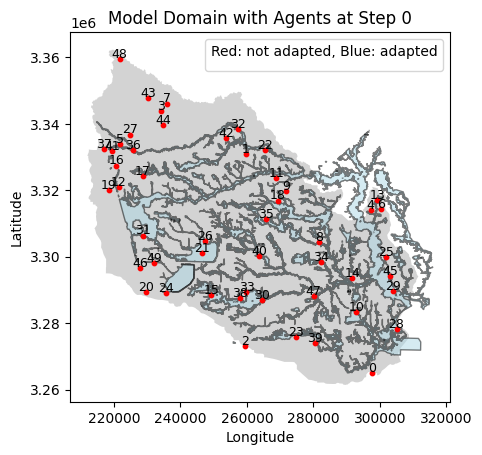

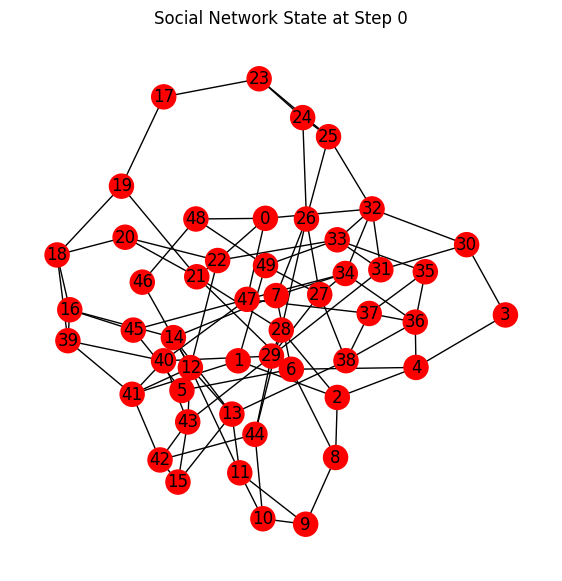

False
True
True
True
False
True
False
True
True
False
False
False
True
False
True
False
True
True
False
True
True
False
False
False
False
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Government step method called.
Supporting non-adapted households.
Non-adapted Households: [<agents.Households object at 0x12799bb60>, <agents.Households object at 0x12799bc50>, <agents.Households object at 0x12799bcb0>, <agents.Households object at 0x12799bd40>, <agents.Households object at 0x12799bd70>, <agents.Households object at 0x12799bda0>, <agents.Households object at 0x12799be00>, <agents.Households object at 0x12799be60>, <agents.Households object at 0x12799bef0>, <agents.Households object at 0x12799bf80>, <agents.Households object at 0x12799bfb0>, <agents.Households object at 0x12799bfe0>, <agents.Households object at 0x12799aa20>, <agents.Households object at 0x127a34080>, <agents.Househo

<Figure size 1000x600 with 0 Axes>

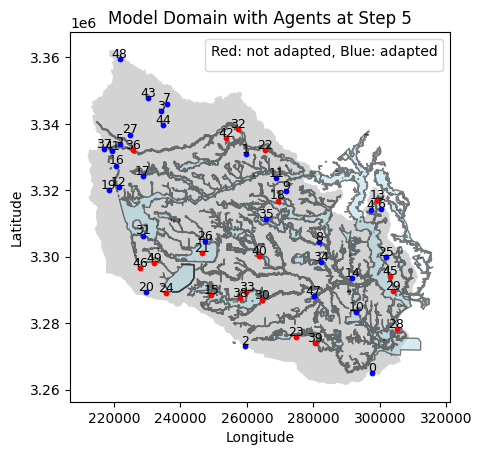

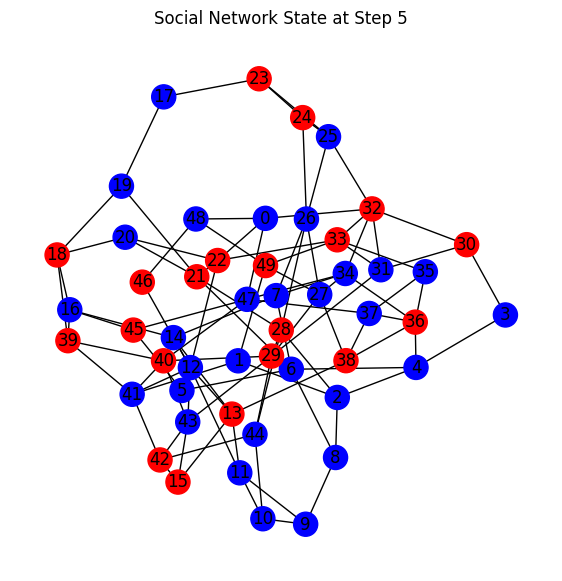

True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
False
True
True
False
False
False
False
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Sandbags: 9 times purchased
Elevating the house: 0 times purchased
Relocating electrical systems: 0 times purchased
None: 41 times purchased
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
False
True
True
False
False
False
False
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Sandbags: 9 times purchased
Elevating the house: 0 times purchased
Relocating electrical systems: 0 times purchased
None: 41 times purchased
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
False
True
True
False
False
False
False
True
True
True

<Figure size 1000x600 with 0 Axes>

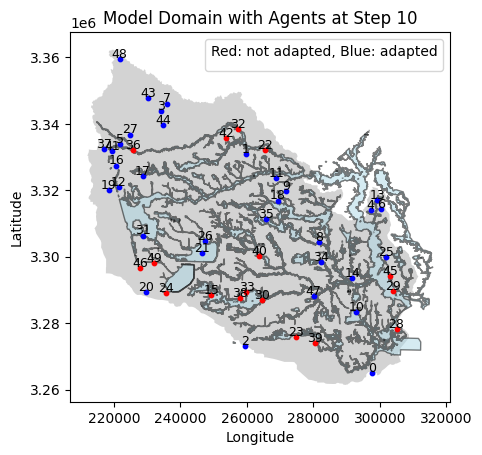

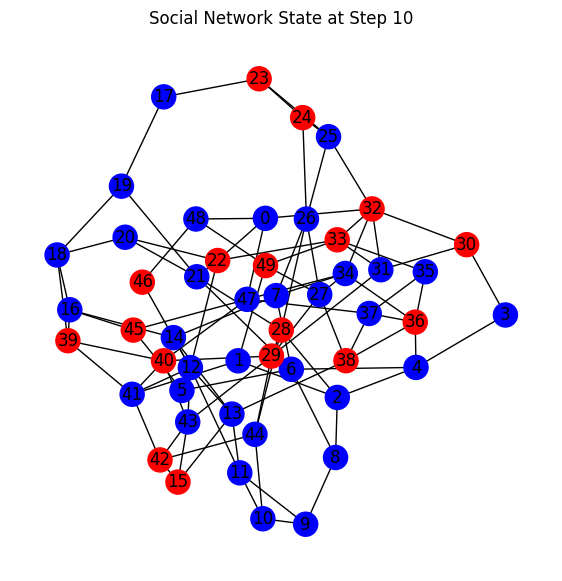

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False
False
False
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Sandbags: 9 times purchased
Elevating the house: 0 times purchased
Relocating electrical systems: 0 times purchased
None: 41 times purchased
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False
False
False
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Sandbags: 9 times purchased
Elevating the house: 0 times purchased
Relocating electrical systems: 0 times purchased
None: 41 times purchased
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False
False
False
True
True
True
False
Fa

<Figure size 1000x600 with 0 Axes>

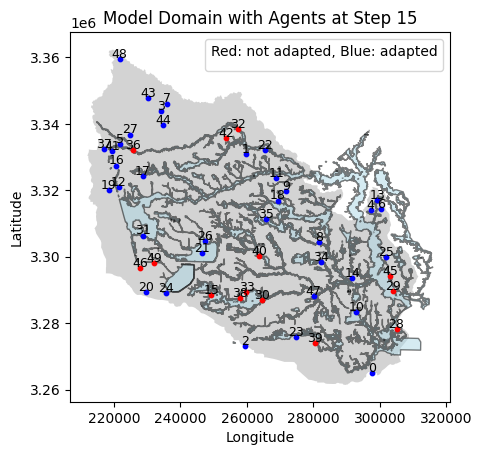

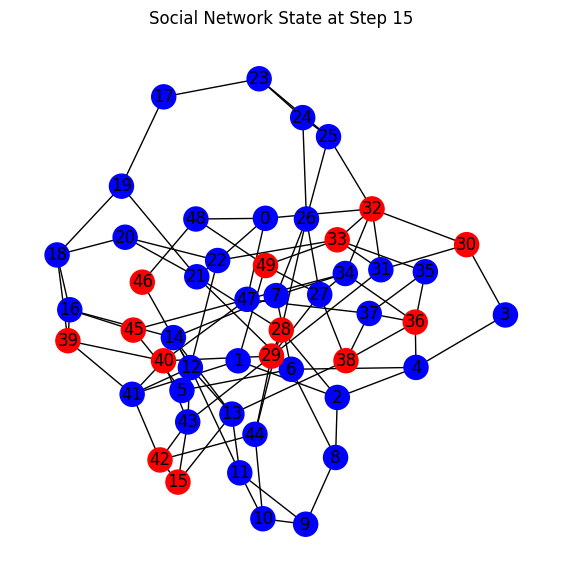

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Sandbags: 9 times purchased
Elevating the house: 0 times purchased
Relocating electrical systems: 0 times purchased
None: 41 times purchased
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
False
True
True
False
subsidy doubled
Government step method called.
Supporting non-adapted households.
Non-adapted Households: [<agents.Households object at 0x12799be60>, <agents.Households object at 0x127a34080>, <agents.Households object at 0x127a340b0>, <agents.Households object at 0x127a340e0>, <agents.Households object at 0x127a3

<Figure size 1000x600 with 0 Axes>

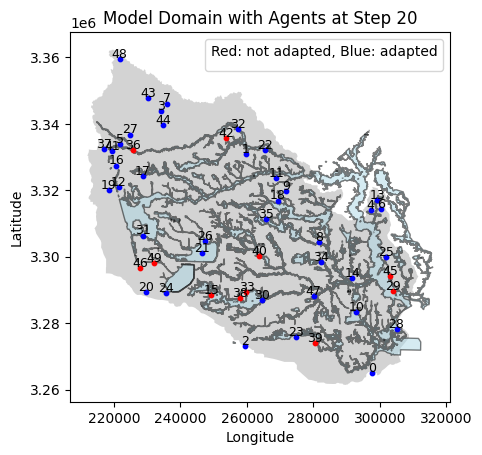

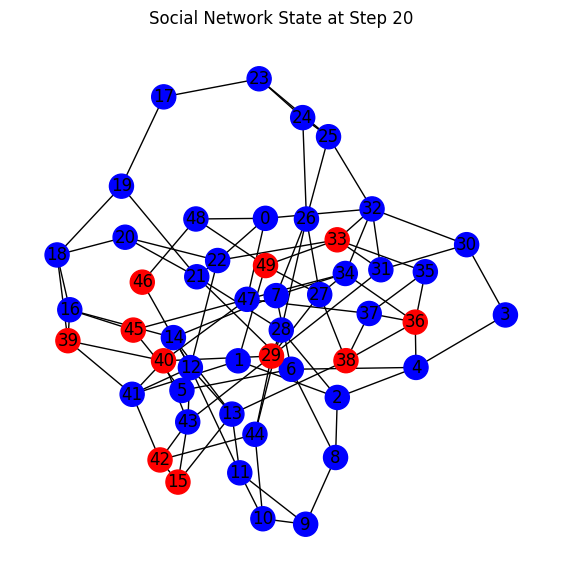

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from agents import Households
from agents import Government

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# # Define a function to plot agents on the network.
# # This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
        # Clear the current axes.
        ax.clear()
        # Determine the color of each node (agent) based on their adaptation status.
        colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents if isinstance(agent, Households)]
        # Draw the network with node colors and labels.
        nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
        # Set the title of the plot with the current step number.
        ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

 # Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

#government_agent = Government(unique_id="gov_1", model=model)
#model.schedule.add(government_agent)
#government_agent.support_non_adapted_households()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    for measure, count in model.flood_measure_count.items():
        print(f"{measure}: {count} times purchased")
    # Assuming 'model' is your AdaptationModel instance

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()




# Optionally, you can directly call methods of the Government agent here


In [2]:
agent_data = model.datacollector.get_model_vars_dataframe()
agent_data


,total_adapted_households
0,27
1,27
2,27
3,27
4,30
5,30
6,30
7,30
8,33
9,33


In [3]:
model_data = model.datacollector.get_agent_vars_dataframe()
model_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
1    0                   1.097291              0.664511          0.000000   
     1                   0.000000              0.000000          0.000000   
     2                   0.000000              0.000000          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.263308              0.415308          0.000000   
...                           ...                   ...               ...   
20   46                  0.245262              0.402912          0.198168   
     47                  0.000000              0.000000          0.000000   
     48                  0.000000              0.000000          0.000000   
     49                  0.324493              0.451789          0.274838   
     gov_1                    NaN                   NaN               NaN   

              FloodDamageActual IsAdapted  FriendsCount  \
Step AgentID                                              
1    0                 0.000000      True           4.0   
     1                 0.000000      True           3.0   
     2                 0.000000      True           4.0   
     3                 0.000000      True           2.0   
     4                 0.000000      True           4.0   
...                         ...       ...           ...   
20   46                0.365686     False           2.0   
     47                0.000000      True           5.0   
     48                0.000000      True           3.0   
     49                0.422791     False           4.0   
     gov_1                  NaN      None           NaN   

                                                   location        wealth  \
Step AgentID                                                                
1    0         POINT (297732.6554019628 3264953.5566303893)  11324.985948   
     1          POINT (259722.3243620105 3330843.964982586)   4814.787611   
     2         POINT (259545.0767934094 3273071.4936428475)   3293.084714   
     3        POINT (234181.46107770136 3343920.2404372166)    680.614984   
     4         POINT (297242.5512529713 3314099.9145301147)   8554.027512   
...                                                     ...           ...   
20   46       POINT (227780.97872556292 3296701.1700949175)   7510.226951   
     47       POINT (280137.86896127474 3288098.1730157067)   9132.120518   
     48        POINT (221660.97392546706 3359518.129602574)  14081.089451   
     49        POINT (232045.32575011958 3297983.772221981)   1639.121655   
     gov_1                                             None           NaN   

             selected_measure reduction_factors household_info  
Step AgentID                                                    
1    0                   None              None           None  
     1                   None              None           None  
     2                   None              None           None  
     3                   None              None           None  
     4                   None              None           None  
...                       ...               ...            ...  
20   46                  None              None           None  
     47              Sandbags              None           None  
     48              Sandbags              None           None  
     49                  None              None           None  
     gov_1               None              None           None  

[1020 rows x 11 columns]